# Imports and Defaults

In [1]:
import os
import numpy as np
import icecream as ic
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import default_rng

from multi_dimensional_scaling import MultiDimensionalScaling
from isomap import IsoMap
from locally_linear_embedding import LocallyLinearEmbedding
from laplacian_eigenmaps import LaplacianEigenmaps

In [2]:
path_to_data = 'data/'
save_path = '../writeup/images'
sns.set_theme()

seed = 0
rng = default_rng(seed)

%load_ext autoreload
%autoreload 2

# Data Imports and Exploration

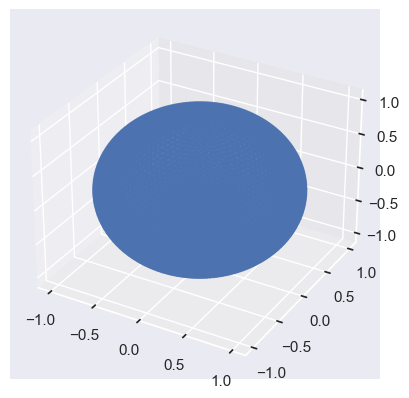

In [3]:
# import data
fname = os.path.join(path_to_data, 'ps2-data-1.txt')
X = np.loadtxt(fname, delimiter='\t', usecols=(1,2,3))

# plot data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

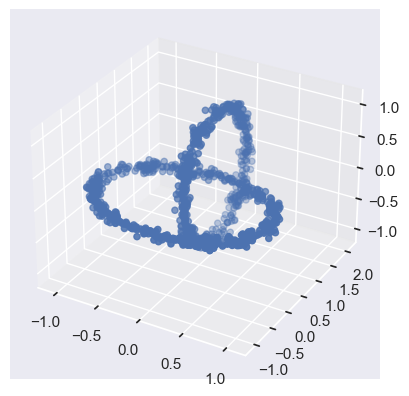

In [4]:
fname = os.path.join(path_to_data, 'ps2-data-2.txt')
X = np.loadtxt(fname, delimiter='\t', usecols=(1,2,3))

# plot data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

# Multi Dimensional Scaling

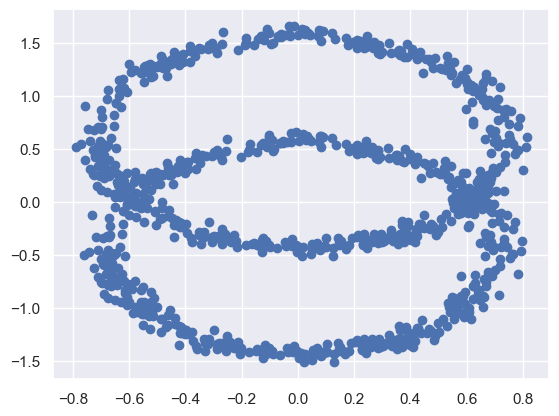

In [5]:
mds = MultiDimensionalScaling(d=2, dissimilarity='euclidean')
Y = mds.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1])

# Isomap

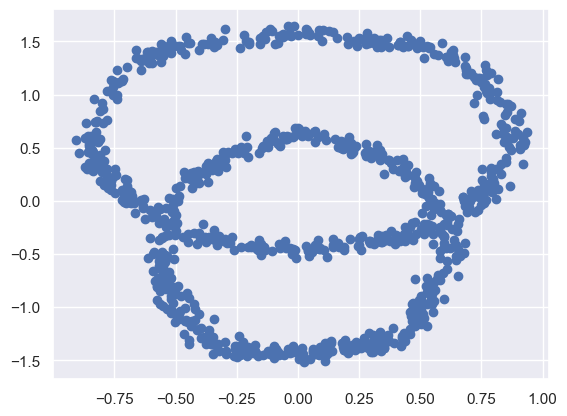

In [6]:
isomap = IsoMap(n_neighbors=250, d=2)
Y = isomap.fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1])

# Locally Linear Embeddings

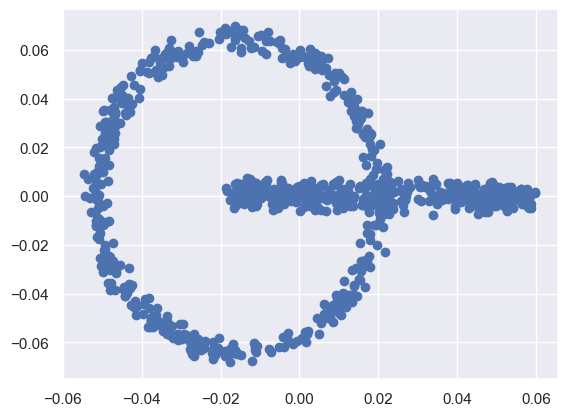

In [7]:
lle = LocallyLinearEmbedding(n_neighbors=400, embedding_dim=2)
Y = lle.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1])

# Laplacian Eigenmaps / Spectral Embeddings

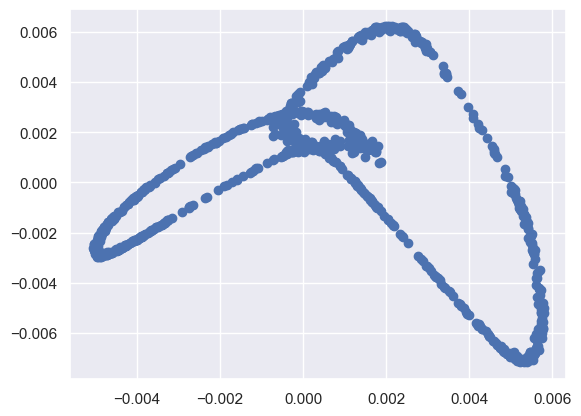

In [8]:
from laplacian_eigenmaps import LaplacianEigenmaps
le = LaplacianEigenmaps(embedding_dim=2, affinity='rbf', n_neighbors=300, sigma=0.40)
Y = le.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1])

# Question 9: Dimensionality Reduction Bakeoff

### Utilities

In [61]:
def subsample(X, m):
    n = X.shape[0]
    idx = rng.integers(low=0, high=n, size=m)
    return X[idx]

def plot_original_data(X, X_sub1, X_sub2, fname):
    n = X.shape[0]
    m1 = X_sub1.shape[0]
    m2 = X_sub2.shape[0]
    
    # init figure and title columns
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(5, 2), subplot_kw = {'projection': '3d'})
    axes[0].set_title('Original Dataset', size='large')
    axes[1].set_title(f'Subsample {int(m1/n*100)}%', size='large')
    axes[2].set_title(f'Subsample {int(m2/n*100)}%', size='large')
    
    # plot data and subsampled data
    axes[0].scatter(X[:,0], X[:,1], X[:,2])
    axes[1].scatter(X_sub1[:,0], X_sub1[:,1], X_sub1[:,2])
    axes[2].scatter(X_sub2[:,0], X_sub2[:,1], X_sub2[:,2])
    
    complete_fname = os.path.join(save_path, fname)
    plt.tight_layout()
    plt.savefig(complete_fname)

### Dataset 1

In [68]:
def plot_dataset1(X, m1, m2):
    n = X.shape[0]
    X_sub1, X_sub2 = subsample(X, m1), subsample(X, m2)
    plot_original_data(X, X_sub1, X_sub2, 'ps1-dataset1-original.png')
    
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))
    axes[0,0].set_title('Original Dataset', size='large')
    axes[0,1].set_title(f'Subsample {int(m1/n*100)}%', size='large')
    axes[0,2].set_title(f'Subsample {int(m2/n*100)}%', size='large')
    
    # multi-dimensional scaling
    mds = MultiDimensionalScaling(2, 'euclidean')
    axes[0,0].set_ylabel('Multi-Dimensional Scaling')
    Y, Y_sub1, Y_sub2 = mds.fit_transform(X), mds.fit_transform(X_sub1), mds.fit_transform(X_sub2)
    
    axes[0,0].scatter(Y[:,0], Y[:,1], color='r')
    axes[0,1].scatter(Y_sub1[:,0], Y_sub1[:,1], color='r')   
    axes[0,2].scatter(Y_sub2[:,0], Y_sub2[:,1], color='r')
    
    # isomap
    iso = IsoMap(n_neighbors=50, d=2)
    axes[1,0].set_ylabel('Isomap')
    Y, Y_sub1, Y_sub2 = iso.fit_transform(X), iso.fit_transform(X_sub1), iso.fit_transform(X_sub2)
    
    axes[1,0].scatter(Y[:,0], Y[:,1], color='g')
    axes[1,1].scatter(Y_sub1[:,0], Y_sub1[:,1], color='g')    
    axes[1,2].scatter(Y_sub2[:,0], Y_sub2[:,1], color='g')
    
    # locally linear embeddings
    lle = LocallyLinearEmbedding(n_neighbors=70, embedding_dim=2)
    axes[2,0].set_ylabel('Locally Linear Embeddings')
    Y, Y_sub1, Y_sub2 = lle.fit_transform(X), lle.fit_transform(X_sub1), lle.fit_transform(X_sub2)
    
    axes[2,0].scatter(Y[:,0], Y[:,1], color='y')
    axes[2,1].scatter(Y_sub1[:,0], Y_sub1[:,1], color='y')    
    axes[2,2].scatter(Y_sub2[:,0], Y_sub2[:,1], color='y')
    
    # lapalacian eigenmaps
    le = LaplacianEigenmaps(embedding_dim=2, affinity='knn', n_neighbors=40, sigma=1.0)
    axes[3,0].set_ylabel('Laplacian Eigenmaps')
    Y, Y_sub1, Y_sub2 = le.fit_transform(X), le.fit_transform(X_sub1), le.fit_transform(X_sub2)
    
    axes[3,0].scatter(Y[:,0], Y[:,1], color='c')
    axes[3,1].scatter(Y_sub1[:,0], Y_sub1[:,1], color='c')   
    axes[3,2].scatter(Y_sub2[:,0], Y_sub2[:,1], color='c')
    
    fname = os.path.join(save_path, 'ps1-dataset1.png')
    plt.savefig(fname)
    plt.show()

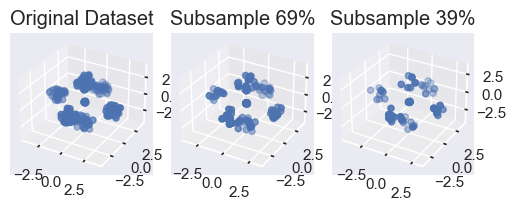

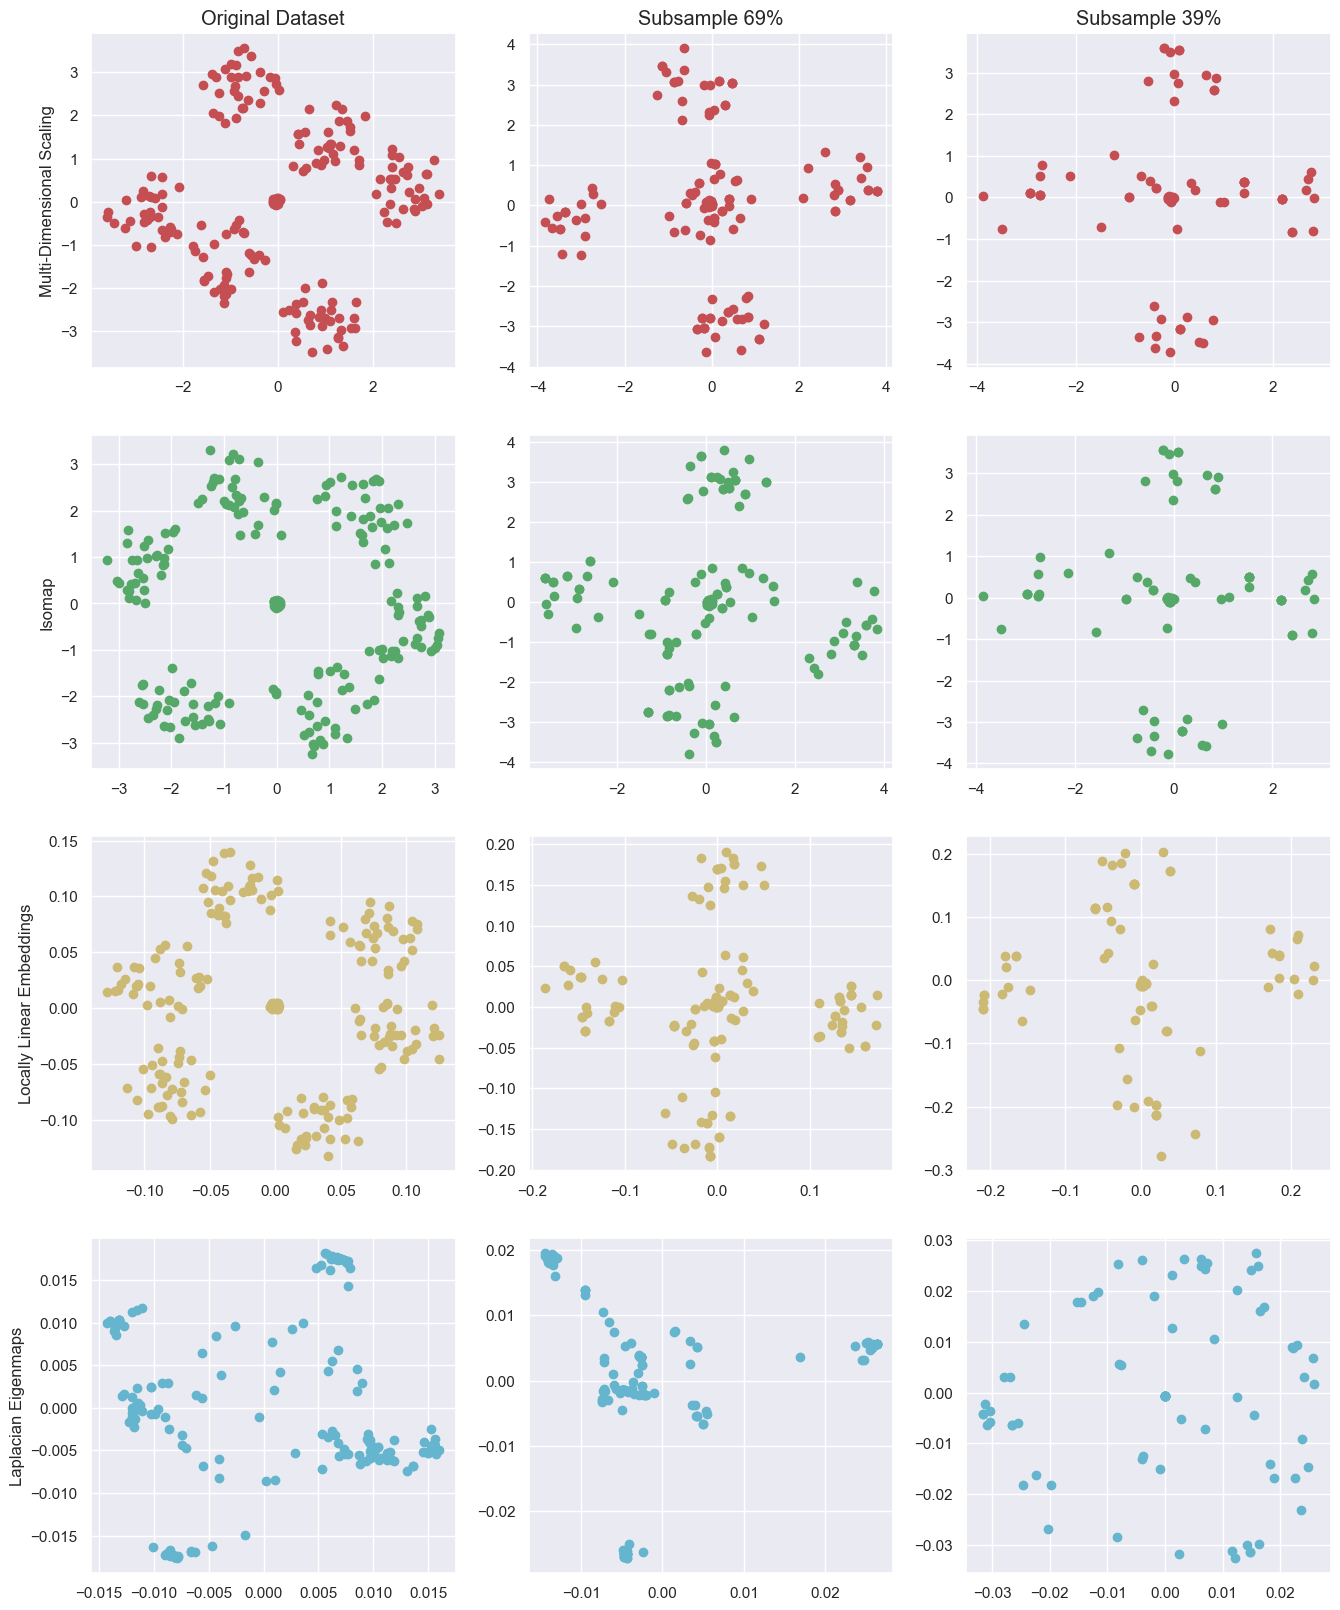

In [69]:
# import data
fname = os.path.join(path_to_data, 'ps1-clustering.txt')
X = np.loadtxt(fname, delimiter='\t', usecols=(1,2,3))

# subsample data, perform dimensionality reduction, and plot
m1 = int(X.shape[0] * 0.7)
m2 = int(X.shape[0] * 0.4)
plot_dataset1(X, m1, m2)

### Dataset 2

In [70]:
def plot_dataset2(X, m1, m2):
    n = X.shape[0]
    X_sub1, X_sub2 = subsample(X, m1), subsample(X, m2)
    plot_original_data(X, X_sub1, X_sub2, 'ps1-dataset2-original.png')
    
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))
    axes[0,0].set_title('Original Dataset', size='large')
    axes[0,1].set_title(f'Subsample {int(m1/n*100)}%', size='large')
    axes[0,2].set_title(f'Subsample {int(m2/n*100)}%', size='large')
    
    # multi-dimensional scaling
    mds = MultiDimensionalScaling(2, 'euclidean')
    axes[0,0].set_ylabel('Multi-Dimensional Scaling')
    Y, Y_sub1, Y_sub2 = mds.fit_transform(X), mds.fit_transform(X_sub1), mds.fit_transform(X_sub2)
    
    axes[0,0].scatter(Y[:,0], Y[:,1], color='r')
    axes[0,1].scatter(Y_sub1[:,0], Y_sub1[:,1], color='r')   
    axes[0,2].scatter(Y_sub2[:,0], Y_sub2[:,1], color='r')
    
    # isomap
    iso = IsoMap(n_neighbors=50, d=2)
    axes[1,0].set_ylabel('Isomap')
    Y, Y_sub1, Y_sub2 = iso.fit_transform(X), iso.fit_transform(X_sub1), iso.fit_transform(X_sub2)
    
    axes[1,0].scatter(Y[:,0], Y[:,1], color='g')
    axes[1,1].scatter(Y_sub1[:,0], Y_sub1[:,1], color='g')    
    axes[1,2].scatter(Y_sub2[:,0], Y_sub2[:,1], color='g')
    
    # locally linear embeddings
    lle = LocallyLinearEmbedding(n_neighbors=70, embedding_dim=2)
    axes[2,0].set_ylabel('Locally Linear Embeddings')
    Y, Y_sub1, Y_sub2 = lle.fit_transform(X), lle.fit_transform(X_sub1), lle.fit_transform(X_sub2)
    
    axes[2,0].scatter(Y[:,0], Y[:,1], color='y')
    axes[2,1].scatter(Y_sub1[:,0], Y_sub1[:,1], color='y')    
    axes[2,2].scatter(Y_sub2[:,0], Y_sub2[:,1], color='y')
    
    # lapalacian eigenmaps
    le = LaplacianEigenmaps(embedding_dim=2, affinity='knn', n_neighbors=40, sigma=1.0)
    axes[3,0].set_ylabel('Laplacian Eigenmaps')
    Y, Y_sub1, Y_sub2 = le.fit_transform(X), le.fit_transform(X_sub1), le.fit_transform(X_sub2)
    
    axes[3,0].scatter(Y[:,0], Y[:,1], color='c')
    axes[3,1].scatter(Y_sub1[:,0], Y_sub1[:,1], color='c')   
    axes[3,2].scatter(Y_sub2[:,0], Y_sub2[:,1], color='c')
    
    fname = os.path.join(save_path, 'ps1-dataset2.png')
    plt.savefig(fname)
    plt.show()

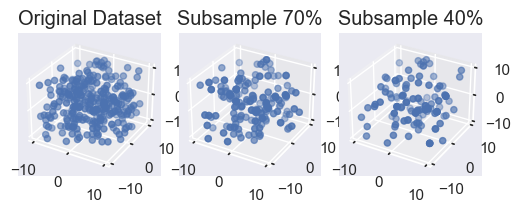

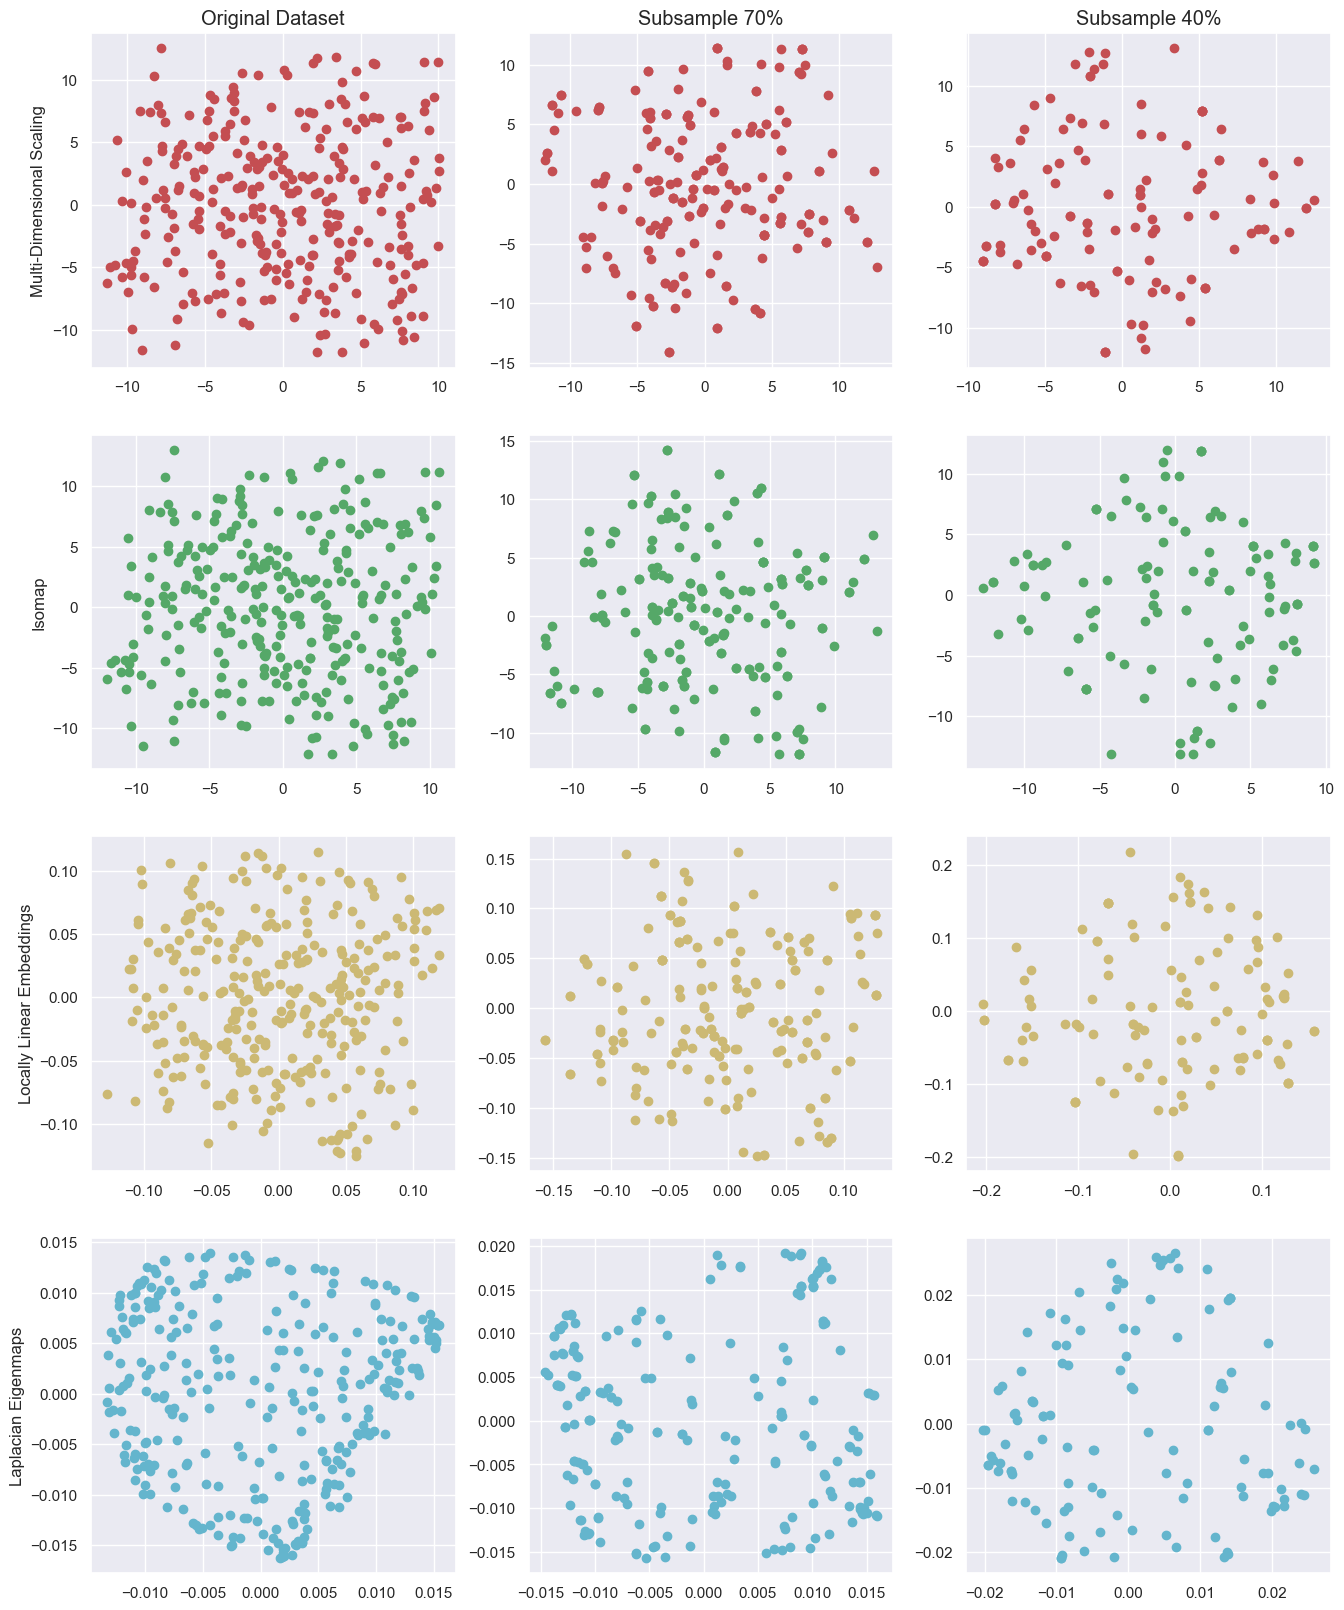

In [71]:
# import data
fname = os.path.join(path_to_data, 'ps1-data.txt')
X = np.loadtxt(fname, delimiter='\t')

# subsample data, perform dim reduction, and plot
m1 = int(X.shape[0] * 0.7)
m2 = int(X.shape[0] * 0.4)
plot_dataset2(X, m1, m2)

### Dataset 3

In [75]:
def plot_dataset3(X, m1, m2):
    n = X.shape[0]
    X_sub1, X_sub2 = subsample(X, m1), subsample(X, m2)
    plot_original_data(X, X_sub1, X_sub2, 'ps2-dataset1-original.png')
    
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))
    axes[0,0].set_title('Original Dataset', size='large')
    axes[0,1].set_title(f'Subsample {int(m1/n*100)}%', size='large')
    axes[0,2].set_title(f'Subsample {int(m2/n*100)}%', size='large')
    
    # multi-dimensional scaling
    mds = MultiDimensionalScaling(2, 'euclidean')
    axes[0,0].set_ylabel('Multi-Dimensional Scaling')
    Y, Y_sub1, Y_sub2 = mds.fit_transform(X), mds.fit_transform(X_sub1), mds.fit_transform(X_sub2)
    
    axes[0,0].scatter(Y[:,0], Y[:,1], color='r')
    axes[0,1].scatter(Y_sub1[:,0], Y_sub1[:,1], color='r')   
    axes[0,2].scatter(Y_sub2[:,0], Y_sub2[:,1], color='r')
    
    # isomap
    iso = IsoMap(n_neighbors=50, d=2)
    axes[1,0].set_ylabel('Isomap')
    Y, Y_sub1, Y_sub2 = iso.fit_transform(X), iso.fit_transform(X_sub1), iso.fit_transform(X_sub2)
    
    axes[1,0].scatter(Y[:,0], Y[:,1], color='g')
    axes[1,1].scatter(Y_sub1[:,0], Y_sub1[:,1], color='g')    
    axes[1,2].scatter(Y_sub2[:,0], Y_sub2[:,1], color='g')
    
    # locally linear embeddings
    lle = LocallyLinearEmbedding(n_neighbors=70, embedding_dim=2)
    axes[2,0].set_ylabel('Locally Linear Embeddings')
    Y, Y_sub1, Y_sub2 = lle.fit_transform(X), lle.fit_transform(X_sub1), lle.fit_transform(X_sub2)
    
    axes[2,0].scatter(Y[:,0], Y[:,1], color='y')
    axes[2,1].scatter(Y_sub1[:,0], Y_sub1[:,1], color='y')    
    axes[2,2].scatter(Y_sub2[:,0], Y_sub2[:,1], color='y')
    
    # lapalacian eigenmaps
    le = LaplacianEigenmaps(embedding_dim=2, affinity='knn', n_neighbors=40, sigma=1.0)
    axes[3,0].set_ylabel('Laplacian Eigenmaps')
    Y, Y_sub1, Y_sub2 = le.fit_transform(X), le.fit_transform(X_sub1), le.fit_transform(X_sub2)
    
    axes[3,0].scatter(Y[:,0], Y[:,1], color='c')
    axes[3,1].scatter(Y_sub1[:,0], Y_sub1[:,1], color='c')   
    axes[3,2].scatter(Y_sub2[:,0], Y_sub2[:,1], color='c')
    
    fname = os.path.join(save_path, 'ps2-dataset1.png')
    plt.savefig(fname)
    plt.show()

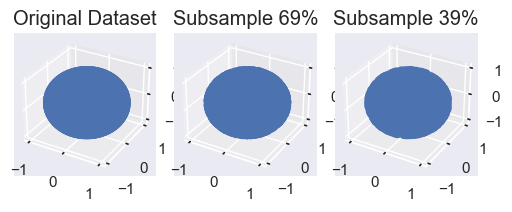

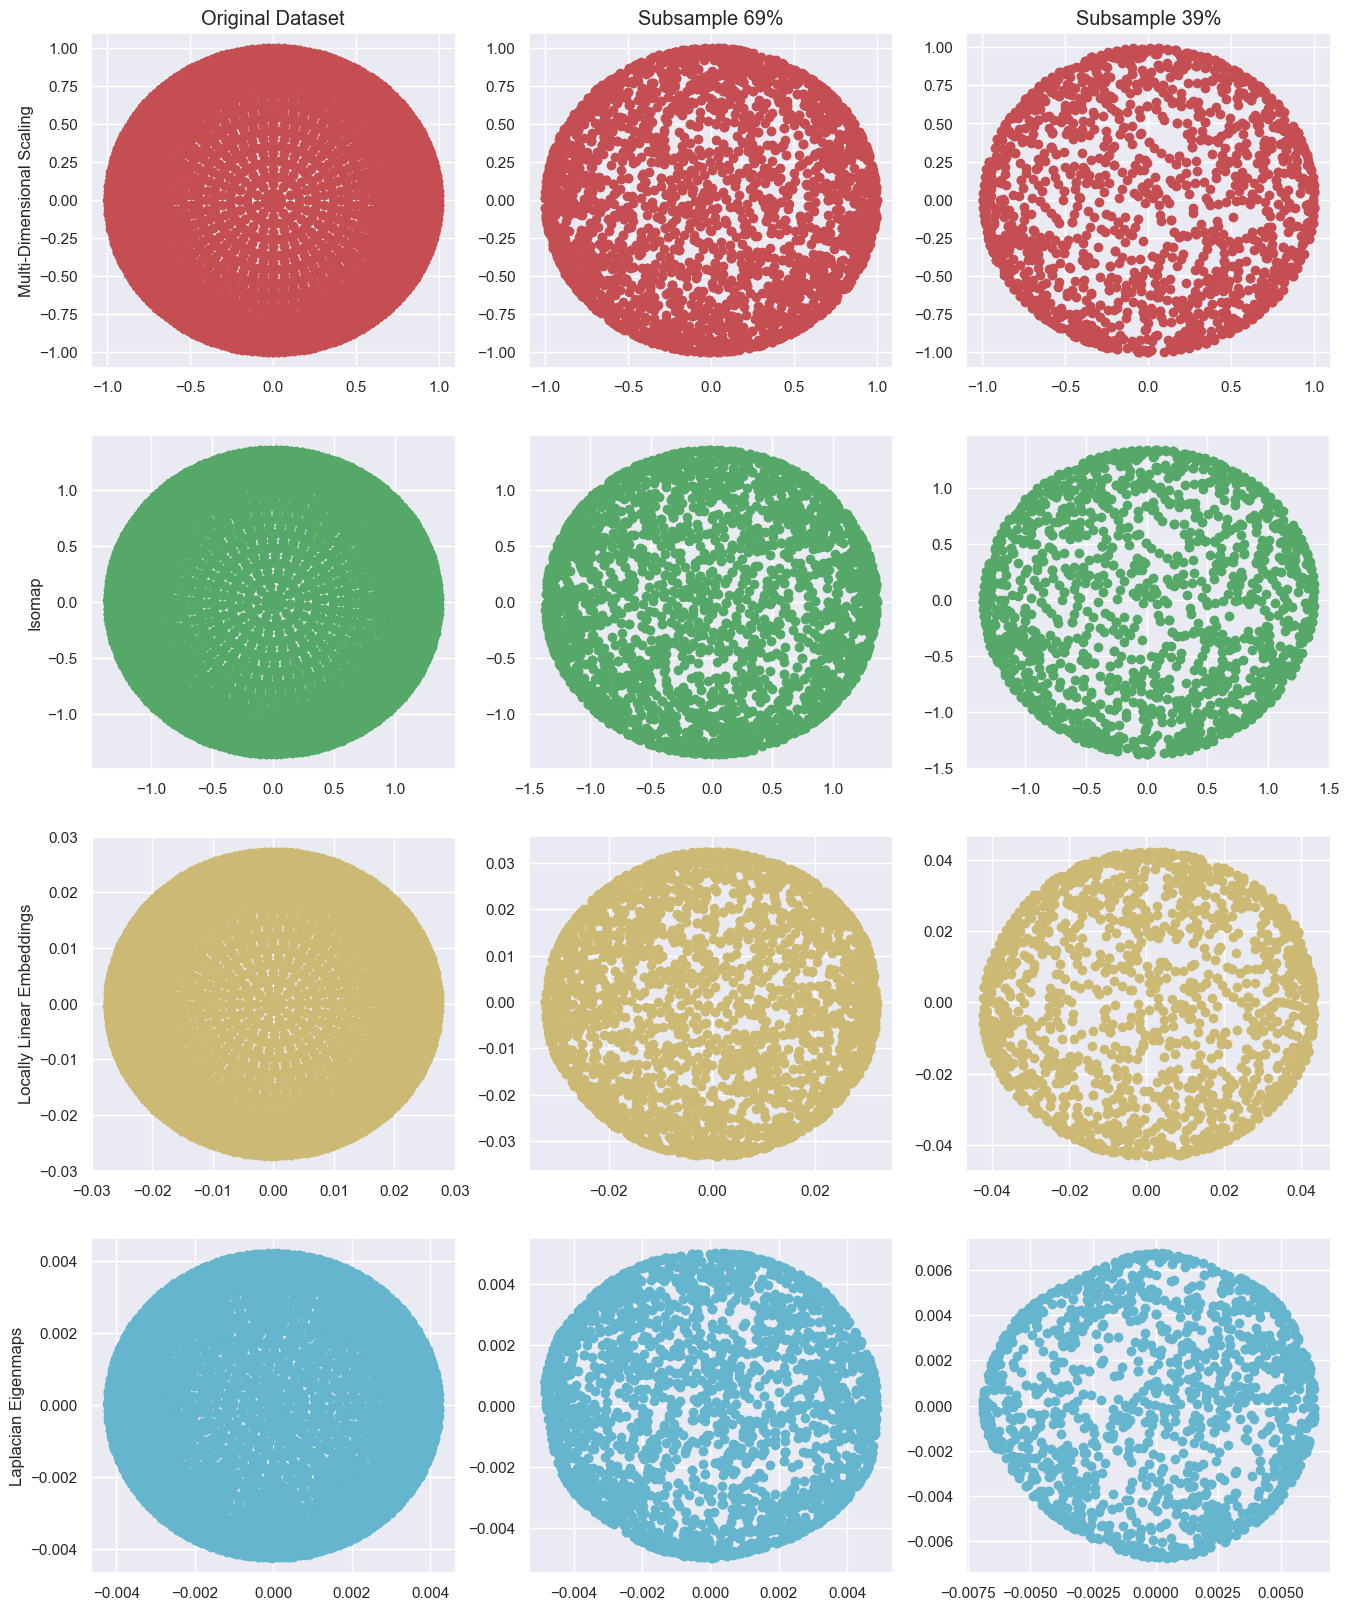

In [76]:
# import data
fname = os.path.join(path_to_data, 'ps2-data-1.txt')
X = np.loadtxt(fname, delimiter='\t', usecols=(1,2,3))

# subsample data, perform dim reduction, and plot
m1 = int(X.shape[0] * 0.7)
m2 = int(X.shape[0] * 0.4)
plot_dataset3(X, m1, m2)

### Dataset 4

In [85]:
def plot_dataset4(X, m1, m2):
    n = X.shape[0]
    X_sub1, X_sub2 = subsample(X, m1), subsample(X, m2)
    plot_original_data(X, X_sub1, X_sub2, 'ps2-dataset2-original.png')
    
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))
    axes[0,0].set_title('Original Dataset', size='large')
    axes[0,1].set_title(f'Subsample {int(m1/n*100)}%', size='large')
    axes[0,2].set_title(f'Subsample {int(m2/n*100)}%', size='large')
    
    # multi-dimensional scaling
    mds = MultiDimensionalScaling(2, 'euclidean')
    axes[0,0].set_ylabel('Multi-Dimensional Scaling')
    Y, Y_sub1, Y_sub2 = mds.fit_transform(X), mds.fit_transform(X_sub1), mds.fit_transform(X_sub2)
    
    axes[0,0].scatter(Y[:,0], Y[:,1], color='r')
    axes[0,1].scatter(Y_sub1[:,0], Y_sub1[:,1], color='r')   
    axes[0,2].scatter(Y_sub2[:,0], Y_sub2[:,1], color='r')
    
    # isomap
    iso = IsoMap(n_neighbors=300, d=2)
    axes[1,0].set_ylabel('Isomap')
    Y, Y_sub1, Y_sub2 = iso.fit_transform(X), iso.fit_transform(X_sub1), iso.fit_transform(X_sub2)
    
    axes[1,0].scatter(Y[:,0], Y[:,1], color='g')
    axes[1,1].scatter(Y_sub1[:,0], Y_sub1[:,1], color='g')    
    axes[1,2].scatter(Y_sub2[:,0], Y_sub2[:,1], color='g')
    
    # locally linear embeddings
    lle = LocallyLinearEmbedding(n_neighbors=300, embedding_dim=2)
    axes[2,0].set_ylabel('Locally Linear Embeddings')
    Y, Y_sub1, Y_sub2 = lle.fit_transform(X), lle.fit_transform(X_sub1), lle.fit_transform(X_sub2)
    
    axes[2,0].scatter(Y[:,0], Y[:,1], color='y')
    axes[2,1].scatter(Y_sub1[:,0], Y_sub1[:,1], color='y')    
    axes[2,2].scatter(Y_sub2[:,0], Y_sub2[:,1], color='y')
    
    # lapalacian eigenmaps
    le = LaplacianEigenmaps(embedding_dim=2, affinity='knn', n_neighbors=300, sigma=0.40)
    axes[3,0].set_ylabel('Laplacian Eigenmaps')
    Y, Y_sub1, Y_sub2 = le.fit_transform(X), le.fit_transform(X_sub1), le.fit_transform(X_sub2)
    
    axes[3,0].scatter(Y[:,0], Y[:,1], color='c')
    axes[3,1].scatter(Y_sub1[:,0], Y_sub1[:,1], color='c')   
    axes[3,2].scatter(Y_sub2[:,0], Y_sub2[:,1], color='c')
    
    fname = os.path.join(save_path, 'ps2-dataset2.png')
    plt.savefig(fname)
    plt.show()

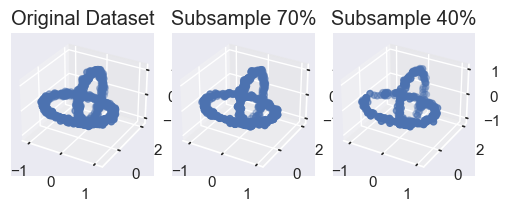

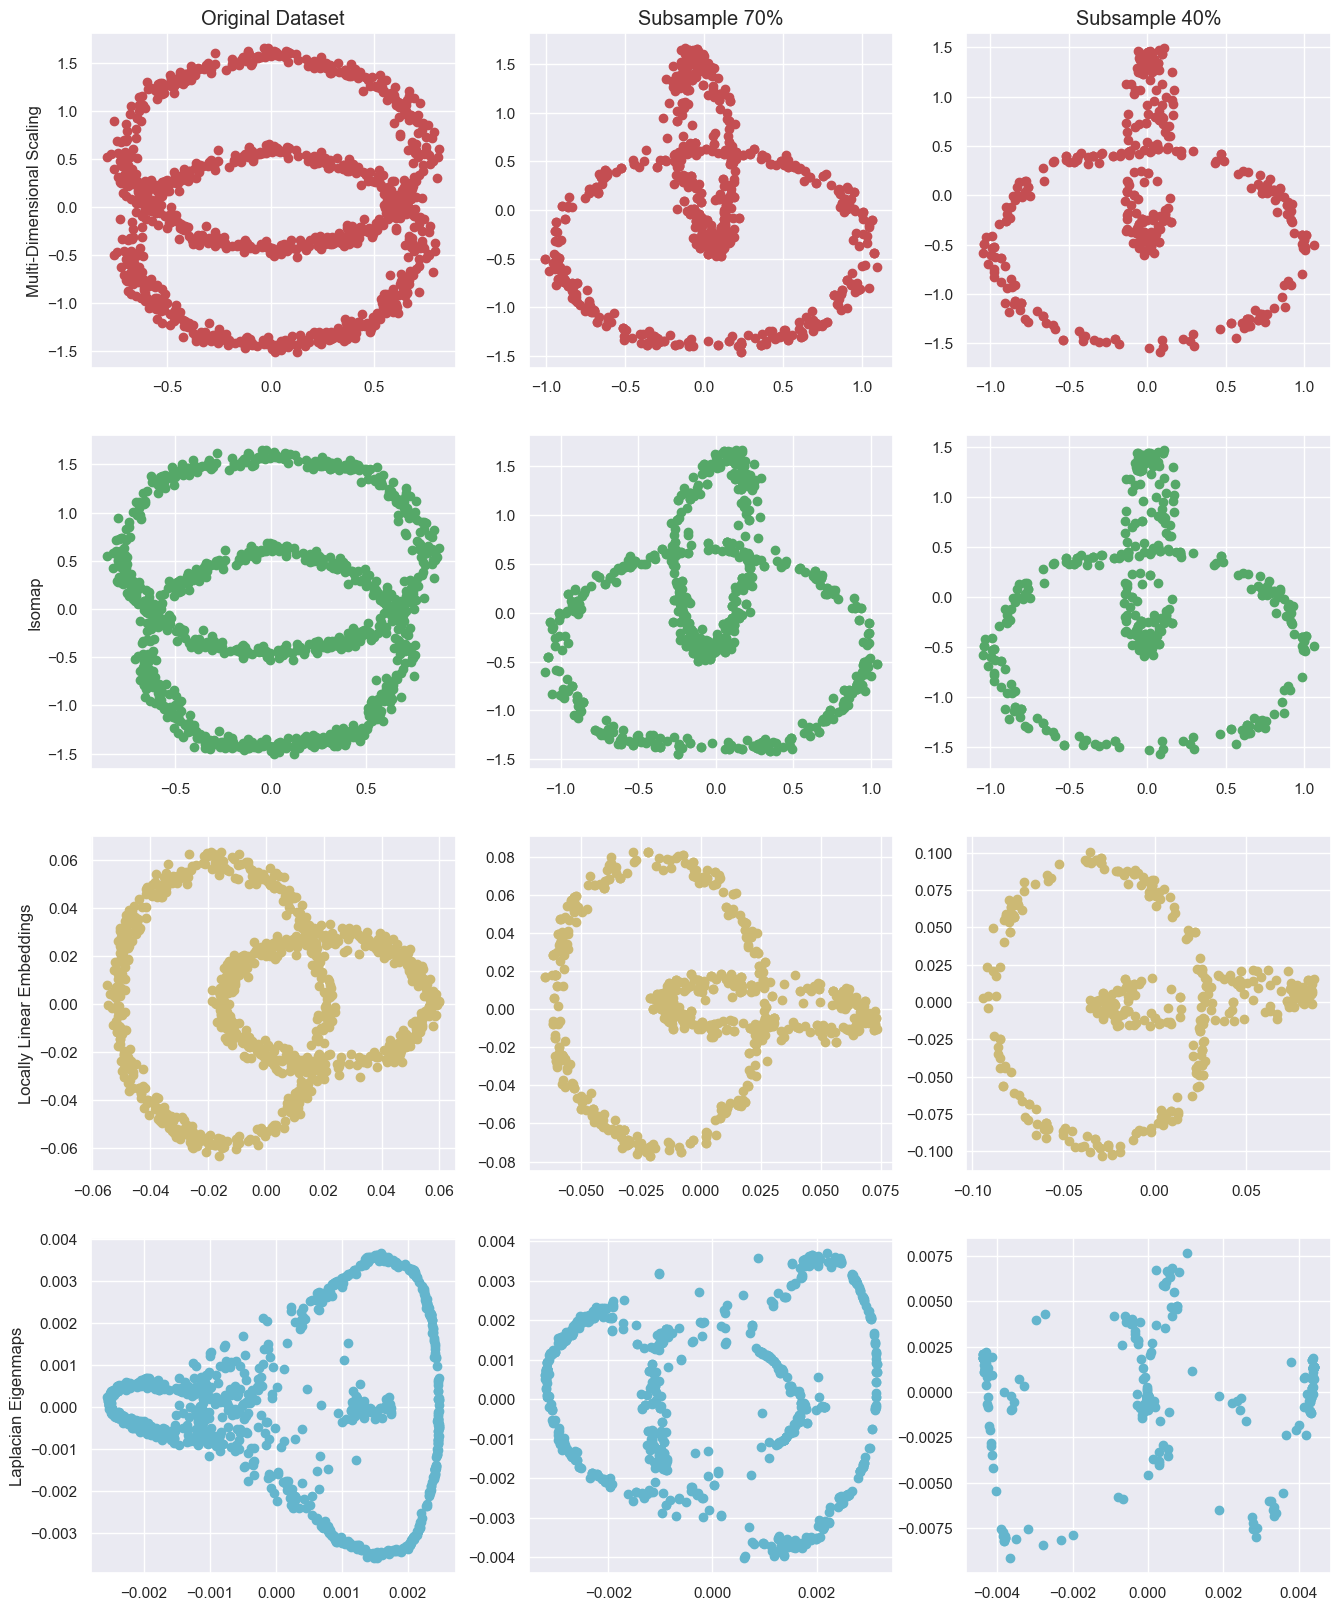

In [86]:
# import data
fname = os.path.join(path_to_data, 'ps2-data-2.txt')
X = np.loadtxt(fname, delimiter='\t', usecols=(1,2,3))

# subsample data, perform dim reduction, and plot
m1 = int(X.shape[0] * 0.7)
m2 = int(X.shape[0] * 0.4)
plot_dataset4(X, m1, m2)